In [1]:
# CT back projection recon in action

In [2]:
# trying my first commit to git from jupyter

## CT Reconstruction

In this exercise we will play with some of the mechanics of how CT scanner generates images. So far in the videos we have talked about the "Tomography" part. Now let's take a closer look at the computation. In this notebook we have some sample code that will load a real CT image and will go through the steps similar to the ones a scanner is going through to do the computation.

You will see snippets of code in this notebook and some snippets will have comments that start with the word TASK. These are yours to fill - read task description and write code that completes the snippet.

## Sinogram

Each time a detector is taking an image, it is computing the amount of photons passing through the body. Since we don't have access to a real scanner, let's simulate this by passing a bunch of rays through a phantom image.

## Loading image and computing a single projection

In [9]:
!pip install Pillow

In [5]:
!pip install scipy

In [6]:
# Our human body will be represented by a jpeg image, so we will use PIL library to load and manipulate it

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd

im = Image.open("phantom.png").convert("L")
print(im)

<PIL.Image.Image image mode=L size=225x225 at 0x2CA0866D188>


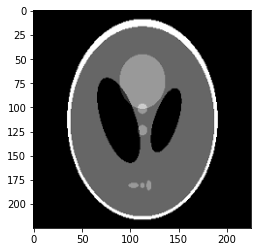

In [8]:
plt.imshow(im,cmap='gray')

Let us compute a projection now. For the sake of simlicity we are assuming that our xrays are following from left to right, all rays are parallel, passing through the entire image. Note that we are just summing all values of pixels that rays meet along the path. In real world the ray would be attenuated by the tissues, and the intensity (or the amount of photons) is decreased as the ray passess through matter, this the detector is effectively subtracting the measured value from a known maximum value. Again, for the sake of simplicity we will do the inverse here - just add everything up.

In [9]:
test = np.array(im)
test.shape

(225, 225)

In [10]:
test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=uint8)

In [11]:
projection = []
m = np.array(im)
for x in range(0, im.width):
    projection.append(np.sum(m[x]))
        

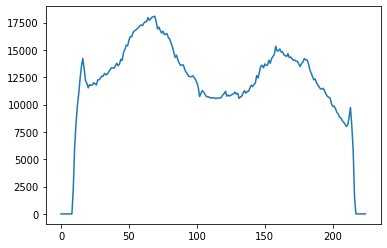

In [17]:
plt.plot(projection)

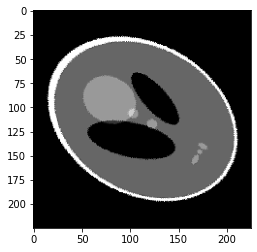

In [18]:
im_r = im.rotate(60)
plt.imshow(im_r, cmap="gray")

In [19]:
m = np.array(im)
for x in range(0, im.width):
    projection.append(np.sum(m[x]))

Computing the Sinogram
Now, let's assume that our scanner is doing a full 180° rotation, sampling a projection every 3 degrees. What you will end up is a collection of projections (1D "X-ray" images) from every angle. Let's store projections in a list of tuples so that we keep track of what angle was used to compute a projection.

In [23]:
# lets compute the projection around it
projections = []
for angle in range(0, 180, 3):
    p = []
    im_r = im.rotate(angle)
    for x in range(0, im.width):
        p.append(np.sum(np.array(im_r)[x]))
    projections.append((angle, p))

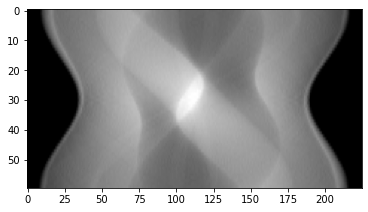

In [36]:
sinogram = np.stack([p[1] for p in projections])
plt.imshow(sinogram, cmap="gray", aspect = 2)

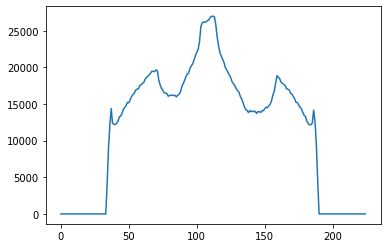

In [41]:
plt.plot(projections[30][1])

In [51]:
bp = np.zeros((im.width, im.height))

for y in range(sinogram.shape[1]):
    bp[:, y] = projections[0][1]

In [55]:
projections[0][1]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2265,
 6094,
 8235,
 9869,
 10975,
 12371,
 13474,
 14218,
 13311,
 12209,
 11944,
 11531,
 11820,
 11757,
 11797,
 11995,
 11916,
 11793,
 12254,
 12271,
 12427,
 12608,
 12591,
 12846,
 12723,
 12783,
 12976,
 13175,
 13365,
 13357,
 13322,
 13544,
 13781,
 13552,
 13704,
 14149,
 14038,
 14787,
 15029,
 15434,
 15371,
 15895,
 16230,
 16211,
 16573,
 16749,
 16817,
 16943,
 17046,
 17220,
 17283,
 17236,
 17458,
 17588,
 17582,
 17963,
 17714,
 17831,
 18006,
 18036,
 18081,
 17591,
 16922,
 17090,
 16786,
 16544,
 16713,
 16410,
 16450,
 16481,
 16113,
 15985,
 15620,
 15270,
 14757,
 14316,
 14515,
 14078,
 13789,
 13584,
 13633,
 13625,
 13229,
 12974,
 12794,
 12578,
 12564,
 12548,
 12638,
 12462,
 12289,
 11987,
 11558,
 10739,
 11052,
 11279,
 11136,
 10940,
 10727,
 10701,
 10696,
 10598,
 10620,
 10628,
 10609,
 10536,
 10597,
 10602,
 10600,
 10672,
 10873,
 11002,
 11216,
 10766,
 10870,
 10780,
 10860,
 10928,
 10983,
 11148,
 10971,


In [56]:
bp = np.zeros((im.width, im.height))

for p in projections:
    
    # Smear the projection
    img = np.zeros(bp.shape)
    for y in range(img.shape[1]):
        img[:, y] = p[1]
        
    # Rotate the projection back
    img = nd.rotate(img, -p[0], reshape = False)
    
    bp += img

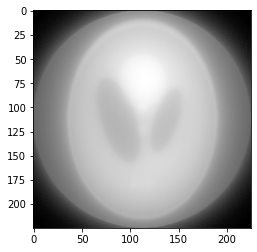

In [57]:
plt.imshow(bp, cmap="gray")

In [43]:
sinogram[1].shape

(225,)